Домашнее задание по теме «Классификация DecisionTree»

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import (
    accuracy_score,  # Метрика точности для классификации
    mean_squared_error,  # Средняя квадратичная ошибка для регрессии
    r2_score,  # Коэффициент детерминации для регрессии
    classification_report  # Отчет о классификации
)

Загрузим данные

In [2]:
train_df=pd.read_csv('train_dataset.csv')

In [3]:
pd.options.display.float_format = '{:,.2f}'.format
train_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.00,0.90,0.90,1,1,118,78,...,70,142,19.80,1,1.00,61,115,125,1,1
1,20,175,110,110.00,0.70,0.90,1,1,119,79,...,71,114,15.90,1,1.10,19,25,30,1,0
2,45,155,65,86.00,0.90,0.90,1,1,110,80,...,57,112,13.70,3,0.60,1090,1400,276,0,0
3,45,165,80,94.00,0.80,0.70,1,1,158,88,...,46,91,16.90,1,0.90,32,36,36,0,0
4,20,165,60,81.00,1.50,0.10,1,1,109,64,...,47,92,14.90,1,1.20,26,28,15,0,0


In [4]:
train_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

В датасете нет пропусков. 

Уменьшим вес датасета.

In [4]:
int_cols = train_df.select_dtypes('int').columns

float_cols = train_df.select_dtypes('float').columns
for col in int_cols:
    train_df[col] = pd.to_numeric(train_df[col], downcast='integer')
for col in float_cols:
    train_df[col] = pd.to_numeric(train_df[col], downcast='float')

In [5]:
train_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int8   
 1   height(cm)           38984 non-null  int16  
 2   weight(kg)           38984 non-null  int16  
 3   waist(cm)            38984 non-null  float32
 4   eyesight(left)       38984 non-null  float32
 5   eyesight(right)      38984 non-null  float32
 6   hearing(left)        38984 non-null  int8   
 7   hearing(right)       38984 non-null  int8   
 8   systolic             38984 non-null  int16  
 9   relaxation           38984 non-null  int16  
 10  fasting blood sugar  38984 non-null  int16  
 11  Cholesterol          38984 non-null  int16  
 12  triglyceride         38984 non-null  int16  
 13  HDL                  38984 non-null  int16  
 14  LDL                  38984 non-null  int16  
 15  hemoglobin           38984 non-null 

# EDA

In [7]:
#Подсчитываем сколько процентов незаполнено столбце
percent_missing = train_df.isnull().sum() * 100 / len(train_df.index)
missing_value_df = pd.DataFrame({'Незаполнено столбце %': percent_missing})

missing_value_df

,Незаполнено столбце %
age,0.00
height(cm),0.00
weight(kg),0.00
waist(cm),0.00
eyesight(left),0.00
eyesight(right),0.00
hearing(left),0.00
hearing(right),0.00
systolic,0.00
relaxation,0.00


In [8]:
#Находим максимальные и минимальные значения
min_max_df = pd.DataFrame({'Максимальное значение': train_df.max(), 'Минимальное значение': train_df.min()})

min_max_df

,Максимальное значение,Минимальное значение
age,85.00,20.00
height(cm),190.00,130.00
weight(kg),135.00,30.00
waist(cm),129.00,51.00
eyesight(left),9.90,0.10
eyesight(right),9.90,0.10
hearing(left),2.00,1.00
hearing(right),2.00,1.00
systolic,233.00,71.00
relaxation,146.00,40.00


In [9]:
#Находим средние значения
mean_df = pd.DataFrame({'Среднее значение': train_df.mean()})

mean_df

,Среднее значение
age,44.13
height(cm),164.69
weight(kg),65.94
waist(cm),82.06
eyesight(left),1.01
eyesight(right),1.01
hearing(left),1.03
hearing(right),1.03
systolic,121.48
relaxation,75.99


In [10]:
#Находим медиану
median_df = pd.DataFrame({'Медиана': train_df.median()})

median_df

,Медиана
age,40.00
height(cm),165.00
weight(kg),65.00
waist(cm),82.00
eyesight(left),1.00
eyesight(right),1.00
hearing(left),1.00
hearing(right),1.00
systolic,120.00
relaxation,76.00


In [11]:
#Находим дисперсию
var_df = pd.DataFrame({'Диспрерсия': train_df.var()})

var_df

,Диспрерсия
age,145.53
height(cm),84.41
weight(kg),166.32
waist(cm),86.99
eyesight(left),0.25
eyesight(right),0.24
hearing(left),0.02
hearing(right),0.03
systolic,186.15
relaxation,93.29


In [12]:
#Находим квантиль 0.1 и 0.9
quantile_df = pd.DataFrame({'Квантиль 0.1': train_df.quantile(0.1), 'Квантиль 0.9': train_df.quantile(0.9)})

quantile_df

,Квантиль 0.1,Квантиль 0.9
age,30.00,60.00
height(cm),150.00,175.00
weight(kg),50.00,85.00
waist(cm),70.00,94.00
eyesight(left),0.60,1.50
eyesight(right),0.60,1.50
hearing(left),1.00,1.00
hearing(right),1.00,1.00
systolic,104.00,138.00
relaxation,64.00,88.00


In [13]:
#Находим квартиль 1 и 3
quartile_df = pd.DataFrame({'Квартиль 1': train_df.quantile(0.25), 'Квартиль 3': train_df.quantile(0.75)})

quartile_df

,Квартиль 1,Квартиль 3
age,40.00,55.00
height(cm),160.00,170.00
weight(kg),55.00,75.00
waist(cm),76.00,88.00
eyesight(left),0.80,1.20
eyesight(right),0.80,1.20
hearing(left),1.00,1.00
hearing(right),1.00,1.00
systolic,112.00,130.00
relaxation,70.00,82.00


# Обучение алгоритма DecisionTreeClassifier

In [7]:
my_random_state = 42

In [8]:
X = train_df.drop('smoking', axis=1)
Y = train_df['smoking']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.3, random_state = my_random_state)

Функция для оценки качества алгоритма

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

def calculate_metrics_and_plot_roc(model, X_train, y_train, X_test, y_test):
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание вероятностей на обучающей и тестовой выборке
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Расчет AUC-ROC
    roc_auc_train = roc_auc_score(y_train, y_train_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    print(f"ROC-AUC Train: {roc_auc_train:.2f}")
    print(f"ROC-AUC Test: {roc_auc_test:.2f}")

    # Построение ROC-кривой
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC Curve Train')
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC Curve Test')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({type(model).__name__})')
    plt.legend()
    plt.show()

    # Поиск порога, максимизирующего F1-score
    thresholds = np.arange(0.0, 1.0, 0.01)
    f1_scores = [f1_score(y_test, y_test_proba >= t) for t in thresholds]
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Optimal Threshold: {optimal_threshold:.2f}")

    # Пересчет метрик с учетом оптимального порога
    y_train_pred_optimal = (y_train_proba >= optimal_threshold).astype(int)
    y_test_pred_optimal = (y_test_proba >= optimal_threshold).astype(int)

    train_precision = precision_score(y_train, y_train_pred_optimal)
    train_accuracy = accuracy_score(y_train, y_train_pred_optimal)
    train_recall = recall_score(y_train, y_train_pred_optimal)
    test_precision = precision_score(y_test, y_test_pred_optimal)
    test_accuracy = accuracy_score(y_test, y_test_pred_optimal)
    test_recall = recall_score(y_test, y_test_pred_optimal)

    print(f"Optimal Training Precision: {train_precision:.2f}")
    print(f"Optimal Training Аccuracy: {train_accuracy:.2f}")
    print(f"Optimal Training Recall: {train_recall:.2f}")
    print(f"Optimal Test Precision: {test_precision:.2f}")
    print(f"Optimal Test Аccuracy: {test_accuracy:.2f}")
    print(f"Optimal Test Recall: {test_recall:.2f}")

    metrics = {
        'params': [
            'Training_Precision', 'Test_Precision',
            'Training_Аccuracy','Test_Аccuracy',
            'Training_Recall', 'Test_Recall',
            'ROC_AUC_Train', 'ROC_AUC_Test'
        ],
        'values': [
            train_precision, test_precision,
            train_accuracy, test_accuracy,
            train_recall, test_recall,
            roc_auc_train, roc_auc_test
        ]
    }

    return metrics

Чтобы выбрать гиперпараметры алгоритма воспользуемся GridSearchCV. Узнаем лучшие параметры и тренируем с ними алгоритм.

In [43]:
from sklearn.model_selection import GridSearchCV

def findDecisionTreeClassifier(X_train, y_train):

    param_grid = {
        'max_depth': range(1, 10, 1),
        'min_samples_leaf': range(1, 20, 2),
        'min_samples_split': range(2, 20, 2),
        'criterion': ["entropy", "gini"]
    }

    # Поиск лучших гиперпараметров
    grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Лучшие гиперпараметры
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Лучшие гиперпараметры: {best_params}")
    print(f"Лучшая точность на валидационной выборке: {best_score}")
    return grid_search

In [44]:
grid_search = findDecisionTreeClassifier(X_train, y_train)

Лучшие гиперпараметры: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 10}
Лучшая точность на валидационной выборке: 0.7236425823001282


In [ ]:
# Создаем модель с лучшим параметры
dt_classifier = grid_search.best_estimator_

Оцениваем качество алгоритма.

ROC-AUC Train: 0.84
ROC-AUC Test: 0.79


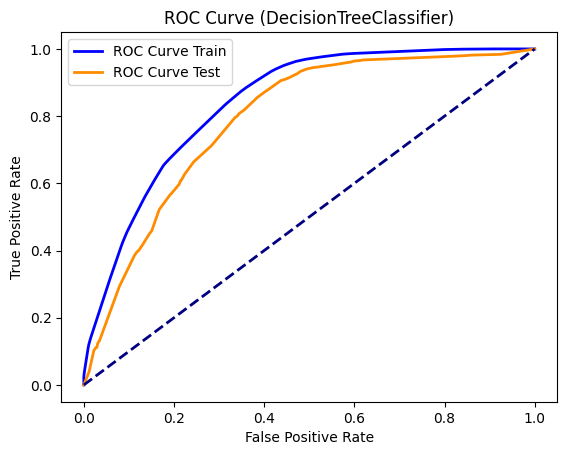

Optimal Threshold: 0.30
Optimal Training Precision: 0.57
Optimal Training Аccuracy: 0.71
Optimal Training Recall: 0.93
Optimal Test Precision: 0.55
Optimal Test Аccuracy: 0.69
Optimal Test Recall: 0.91


In [46]:
metrics_tree  = calculate_metrics_and_plot_roc(dt_classifier, X_train, y_train, X_test, y_test)

In [47]:
# Предсказание вероятностей на обучающих данных
y_pred_proba = dt_classifier.predict_proba(X_test)

# Расчет Gini-impurity для корневого узла (весь набор данных)
class_probabilities = np.mean(y_pred_proba, axis=0)
gini_impurity = 1 - np.sum(np.square(class_probabilities))
print(f"Gini-impurity для корневого узла: {gini_impurity}")

Gini-impurity для корневого узла: 0.46741953544428705


In [48]:
# Рассчитать логарифмическую потерю
from sklearn.metrics import log_loss as sk_log_loss
log_loss_value = sk_log_loss(y_test, y_pred_proba)
print(f"Логарифмическая потеря: {log_loss_value}")

Логарифмическая потеря: 0.8234809597894746


# График дерева
4) Постройте и выгрузите визуальное представление дерева решений. При необходимости, обрежьте дерево

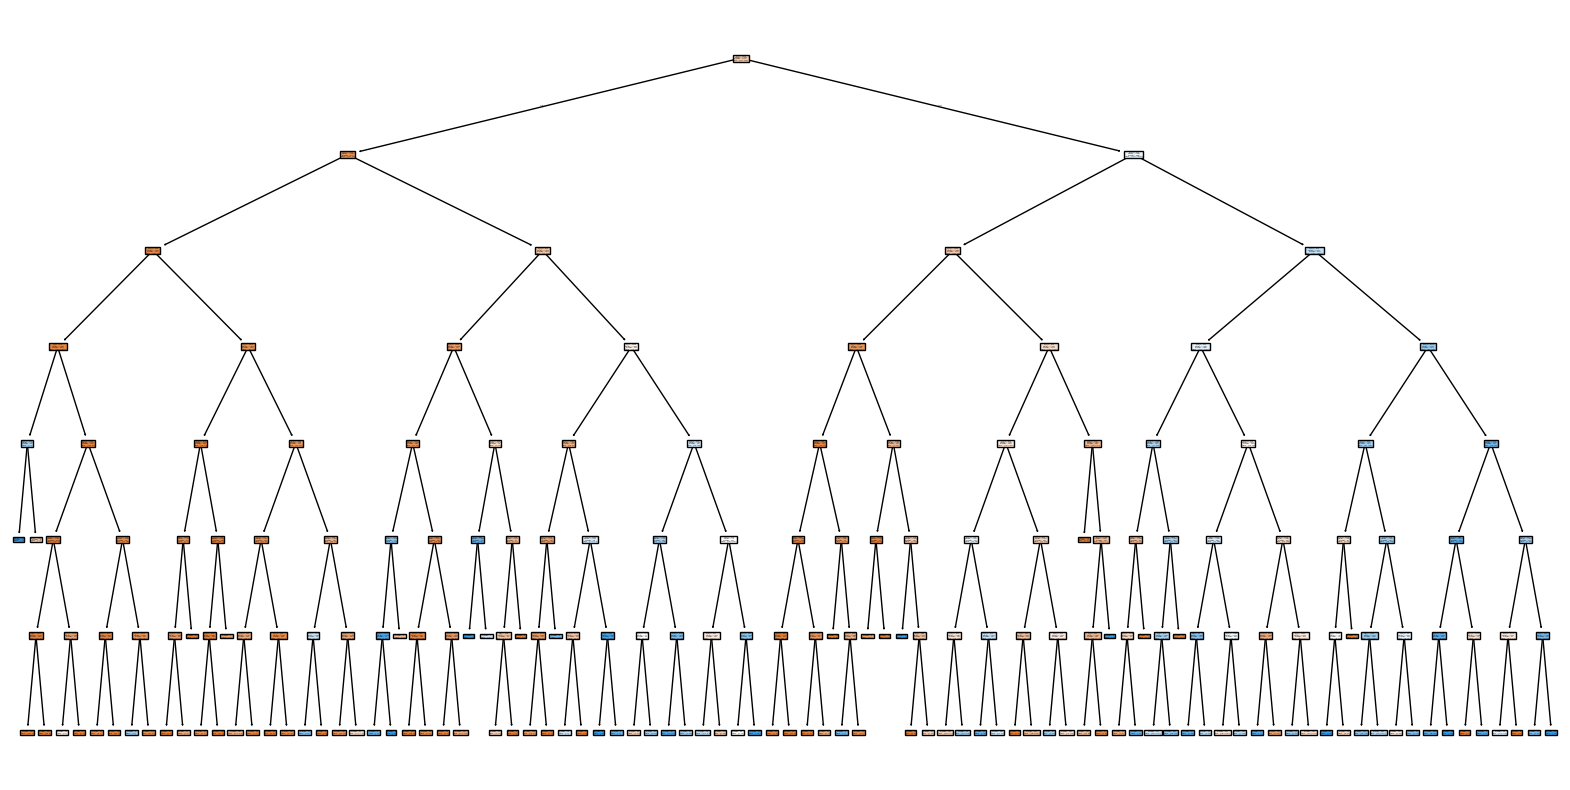

In [49]:
fig = plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True)
plt.show()
#fig.savefig("decistion_tree.png")

In [50]:
text_representation = export_text(dt_classifier)
print(text_representation)
# with open("decistion_tree.log", "w") as fout:
#     fout.write(text_representation)

|--- feature_1 <= 162.50
|   |--- feature_15 <= 14.45
|   |   |--- feature_20 <= 23.50
|   |   |   |--- feature_0 <= 37.50
|   |   |   |   |--- feature_19 <= 13.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_19 >  13.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  37.50
|   |   |   |   |--- feature_15 <= 13.85
|   |   |   |   |   |--- feature_10 <= 134.00
|   |   |   |   |   |   |--- feature_8 <= 125.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_8 >  125.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_10 >  134.00
|   |   |   |   |   |   |--- feature_11 <= 166.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_11 >  166.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_15 >  13.85
|   |   |   |   |   |--- feature_17 <= 0.75
|   |   |   |   |   |   |--- feature_13 <= 49.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   

# Выбрать столбец
5) Выбрать один из столбцов, который имеет наибольший вес в модели и влияет на целевую переменную

In [41]:
weight_data = pd.DataFrame(
    {"feature": X.columns, "importance": dt_classifier.feature_importances_}
).sort_values(by="importance", ascending=False).reset_index(drop=True)
weight_data

,feature,importance
0,height(cm),0.47
1,hemoglobin,0.16
2,Gtp,0.14
3,triglyceride,0.03
4,ALT,0.03
5,serum creatinine,0.02
6,age,0.02
7,Cholesterol,0.02
8,LDL,0.02
9,HDL,0.02


Text(0.5, 1.0, 'Коэффициенты/важность признаков')

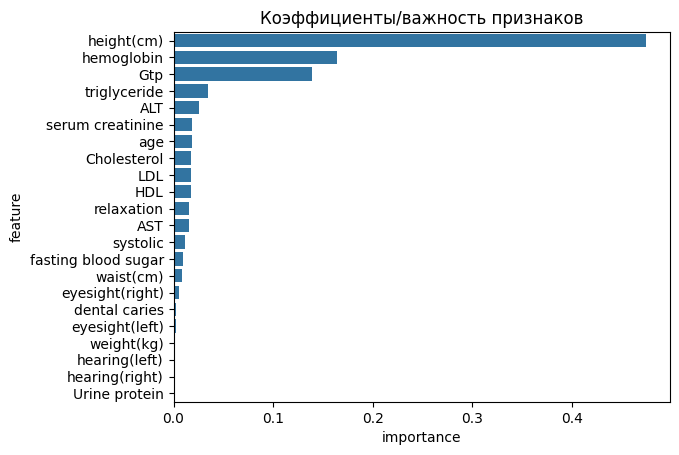

In [42]:
sns.barplot(x='importance', y='feature', data=weight_data)
plt.title('Коэффициенты/важность признаков')

Выберем столбец height(cm), так как он имеет самое большое влияние на целевую переменную.

# Поддерево из 1 столбца
6) Построить модель дерева решений с 1 столбцов на входе и 1 столбцом на выходе. Оценить качество модели

In [54]:
X = pd.DataFrame(train_df['height(cm)'])
Y = train_df['smoking']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.3, random_state = my_random_state)

In [56]:
grid_search = findDecisionTreeClassifier(X_train, y_train)

Лучшие гиперпараметры: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшая точность на валидационной выборке: 0.6814878153056861


In [57]:
dt1_classifier = grid_search.best_estimator_

ROC-AUC Train: 0.74
ROC-AUC Test: 0.73


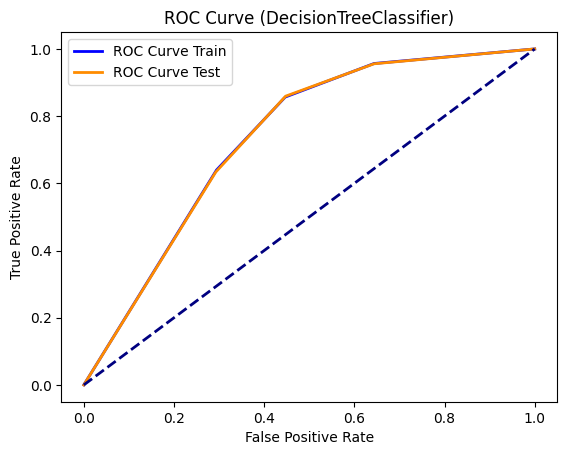

Optimal Threshold: 0.23
Optimal Training Precision: 0.53
Optimal Training Аccuracy: 0.66
Optimal Training Recall: 0.86
Optimal Test Precision: 0.53
Optimal Test Аccuracy: 0.67
Optimal Test Recall: 0.86


In [58]:
metrics_tree1  = calculate_metrics_and_plot_roc(dt1_classifier, X_train, y_train, X_test, y_test)

In [59]:
# Предсказание вероятностей на обучающих данных
y_pred_proba = dt1_classifier.predict_proba(X_test)

# Расчет Gini-impurity для корневого узла (весь набор данных)
class_probabilities = np.mean(y_pred_proba, axis=0)
gini_impurity = 1 - np.sum(np.square(class_probabilities))
print(f"Gini-impurity для корневого узла: {gini_impurity}")

Gini-impurity для корневого узла: 0.4643793520979508


In [60]:
# Рассчитать логарифмическую потерю
from sklearn.metrics import log_loss as sk_log_loss
log_loss_value = sk_log_loss(y_test, y_pred_proba)
print(f"Логарифмическая потеря: {log_loss_value}")

Логарифмическая потеря: 0.5559174236880532


# График поддерева
7) Построить и выгрузить график дерева решений для простой модели с 1 столбцом на входе и 1 столбцом на выходе.

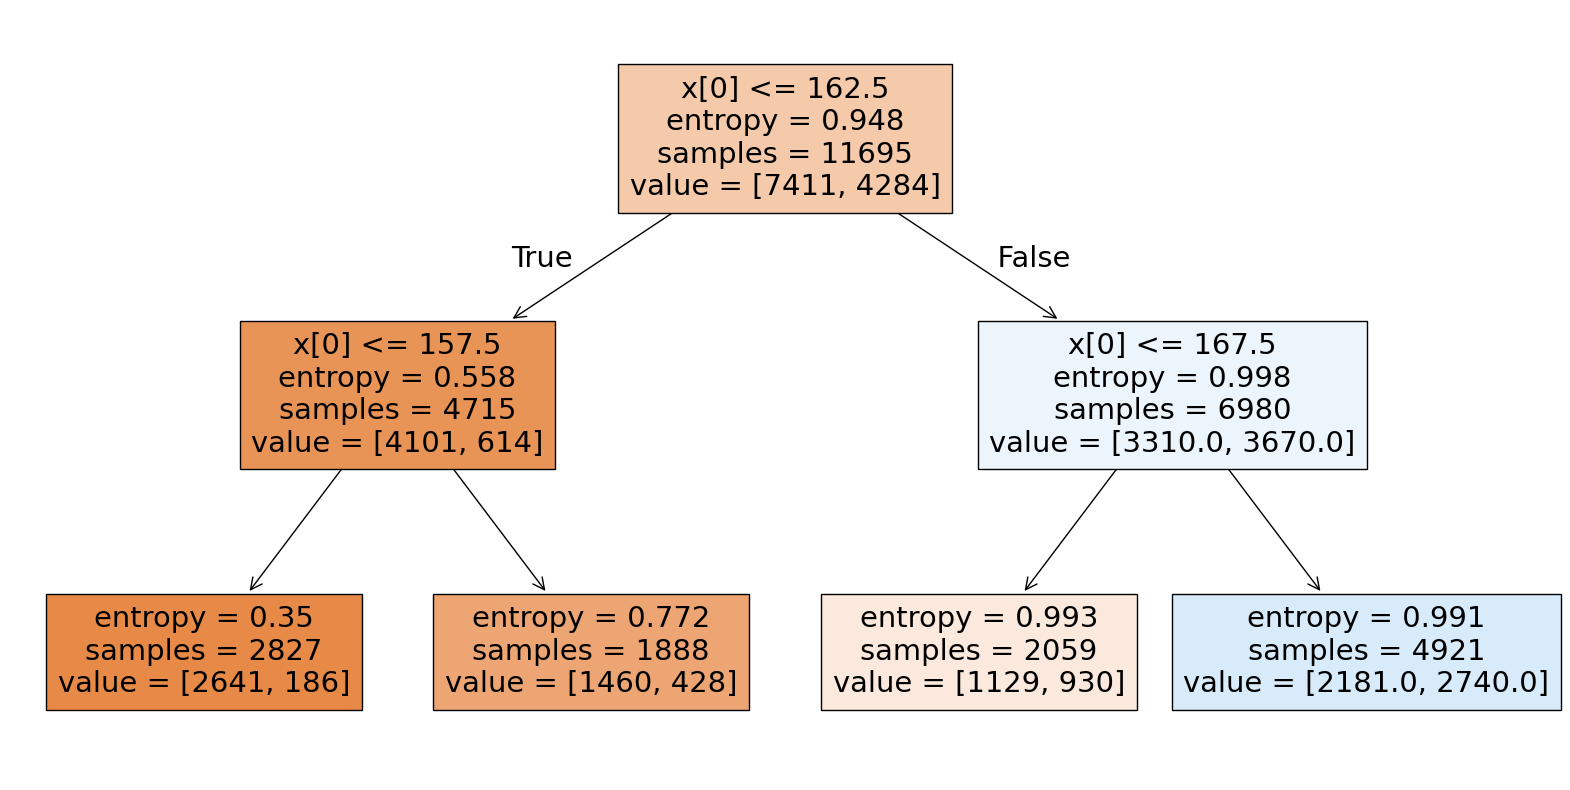

In [61]:
fig = plt.figure(figsize=(20,10))
plot_tree(dt1_classifier, filled=True)
plt.show()
#fig.savefig("decistion_tree_1.png")

In [62]:
text_representation = export_text(dt1_classifier)
print(text_representation)
# with open("decistion_tree_1.log", "w") as fout:
#     fout.write(text_representation)

|--- feature_0 <= 162.50
|   |--- feature_0 <= 157.50
|   |   |--- class: 0
|   |--- feature_0 >  157.50
|   |   |--- class: 0
|--- feature_0 >  162.50
|   |--- feature_0 <= 167.50
|   |   |--- class: 0
|   |--- feature_0 >  167.50
|   |   |--- class: 1

